<a href="https://colab.research.google.com/github/yashbrahmankar18/DescriptiveAnalysis/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import missingno as msno
import os
from collections import Counter

df=pd.read_csv("/content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


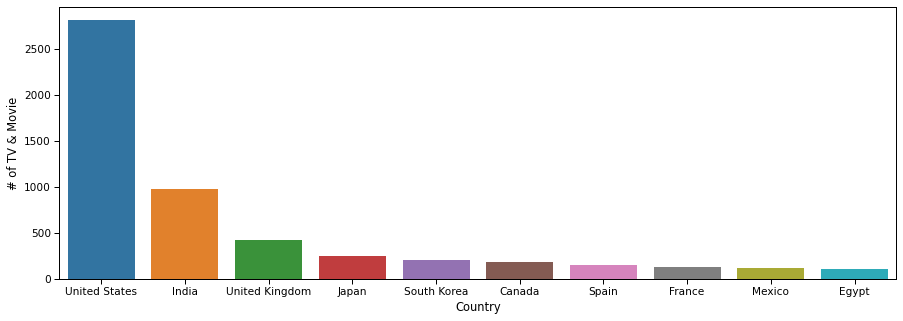

In [ ]:
count_type = df.groupby(['country']).count()
df1 = count_type['type'].to_frame().reset_index().sort_values(by='type', ascending=False)[:10]

plt.figure(figsize=(15,5))
sns.set_context('paper', font_scale=1.2)
sns.barplot(x='country', y='type', data = df1)
plt.ylabel('# of TV & Movie')
plt.xlabel('Country')
plt.show()

In [ ]:
Counter(df['country']).most_common(2)

[('United States', 2818), ('India', 972)]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


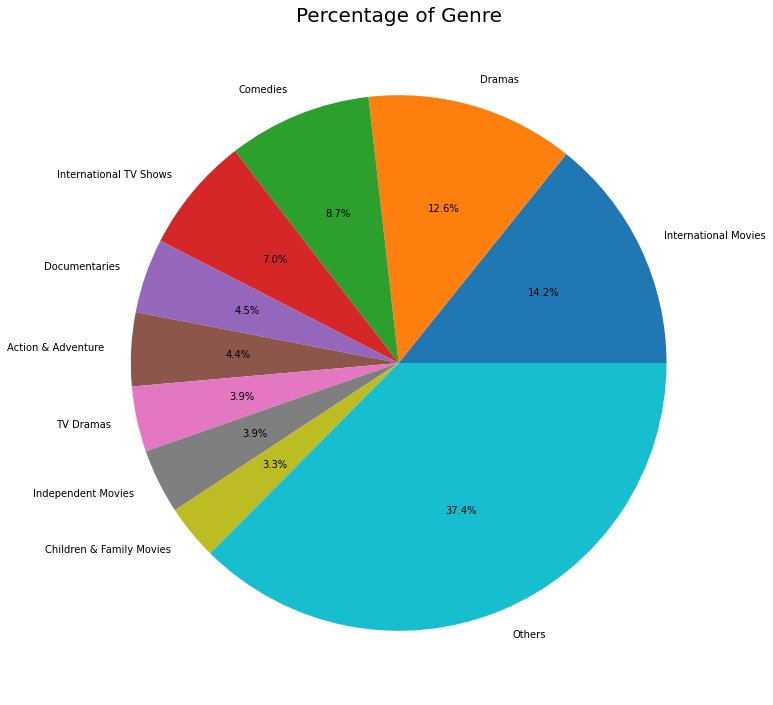

In [ ]:
from seaborn.palettes import color_palette
import matplotlib.pyplot as plt

top9_genre = [(lambda x: x)(x.strip()) for x in ','.join(df['listed_in']).split(',')]
top9_list = list(Counter(top9_genre).most_common(9))
total_genre = len(top9_genre)
labels = [(lambda x:x)(x[0]) for x in top9_list]
labels.append('Others')
sizes = [(lambda x:x)(x[1]) for x in top9_list]
sizes.append(total_genre - sum(sizes))

plt.figure(figsize=(12,15))
plt.title('Percentage of Genre', fontsize=20)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
plt.show()

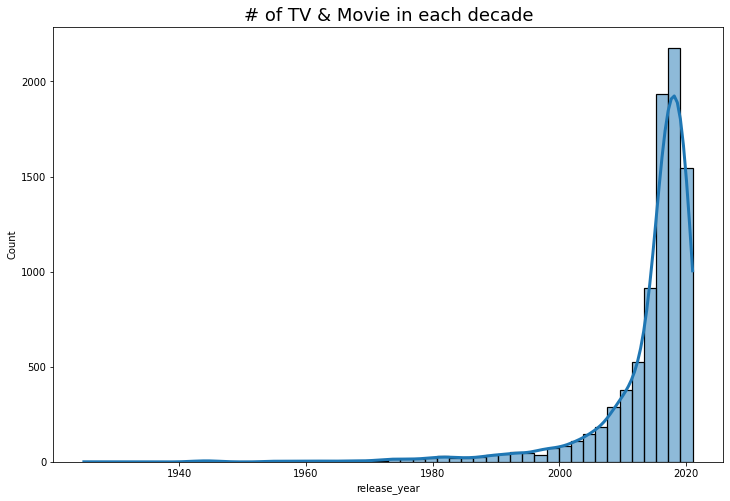

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
plt.title('# of TV & Movie in each decade', fontsize=18)
sns.set_context("poster", font_scale = 0.8)
sns.histplot(df['release_year'], bins=50, kde=True)
plt.show()